# Movie Genre Predictor

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kaggle_movie_train.csv')

#### Exploring the dataset

In [3]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [4]:
df.shape

(22579, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [6]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


##### Finding unique genres

In [7]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

#### Genre Count Visualization

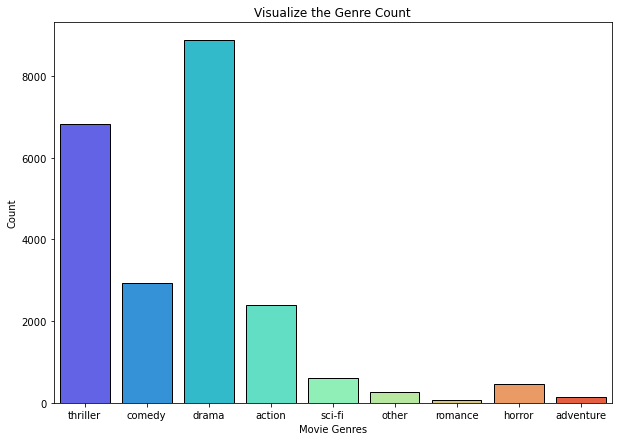

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x='genre', data=df,palette='rainbow',edgecolor=(0,0,0))
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Visualize the Genre Count')
plt.show()

##### Mapping the genres to values 

In [9]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


###### Finding NaN values

In [10]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

<AxesSubplot:>

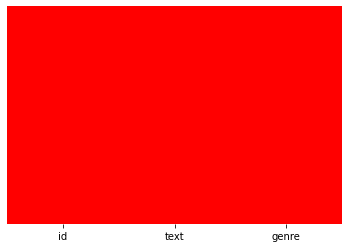

In [11]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False,cmap="autumn" )

In [12]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

##### Importing essential libraries for performing Natural Language Processing

In [13]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sheem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df.shape

(22579, 2)

#### Data Preprocessing

In [15]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [16]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [17]:
len(corpus)

22579

In [17]:
other_words = []
for i in list(df[df['genre']==0].index):
  other_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

adventure_words = []
for i in list(df[df['genre']==2].index):
  adventure_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

horror_words = []
for i in list(df[df['genre']==5].index):
  horror_words.append(corpus[i])

romance_words = []
for i in list(df[df['genre']==6].index):
  romance_words.append(corpus[i])


thriller_words = []
for i in list(df[df['genre']==8].index):
  thriller_words.append(corpus[i])

other=''
adventure=''
romance=''
drama = ''
horror=''
thriller=''
action = ''
comedy = ''

for i in range(0, 3):
      
  
  other += other_words[i]
  drama += drama_words[i]
  action += action_words[i]
  horror += horror_words[i]  
  comedy += comedy_words[i]
  thriller += thriller_words[i]
  adventure += adventure_words[i]
  romance += romance_words[i]  

#### Wordcloud Representation

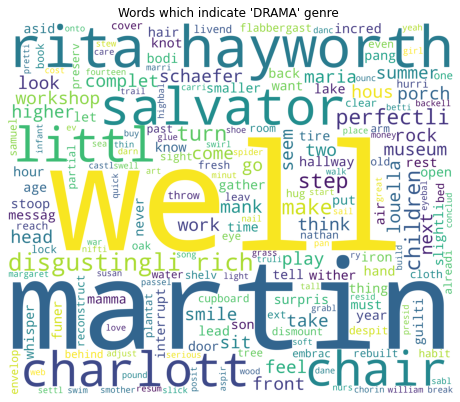

In [18]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

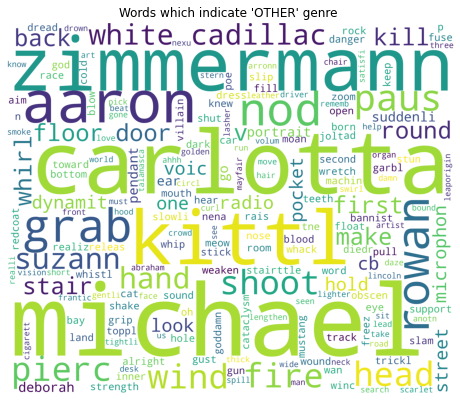

In [19]:
# Creating wordcloud for other genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(other)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'OTHER' genre ")
plt.show()

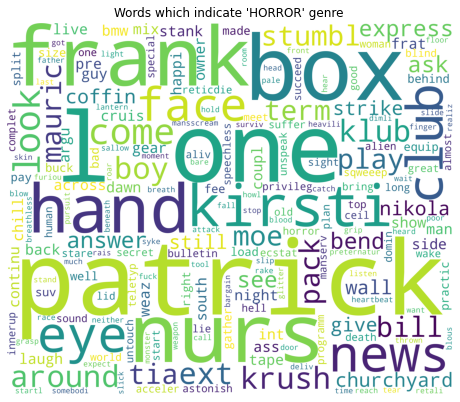

In [20]:
# Creating wordcloud for horror genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(horror)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'HORROR' genre ")
plt.show()

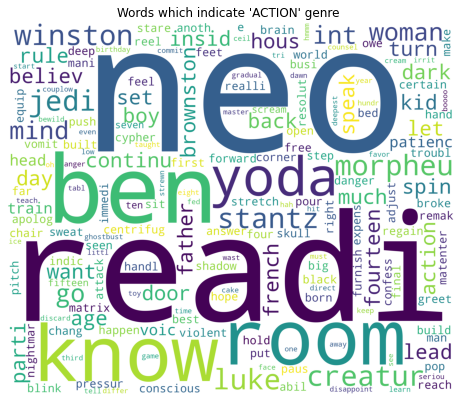

In [21]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

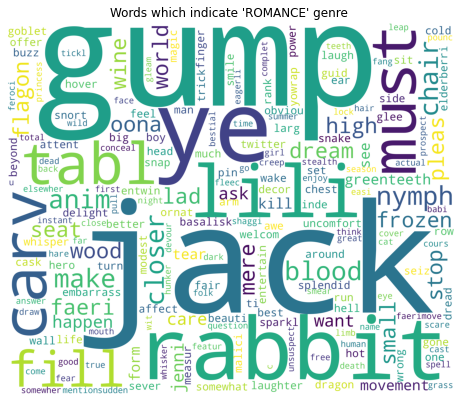

In [22]:
# Creating wordcloud for romance genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(romance)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'ROMANCE' genre ")
plt.show()

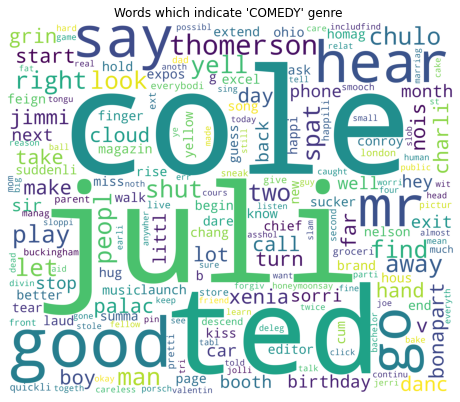

In [23]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

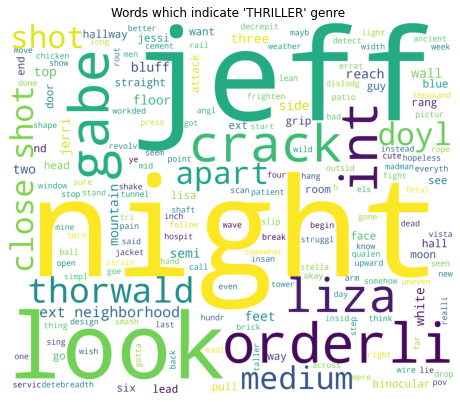

In [24]:
# Creating wordcloud for thriller genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(thriller)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'THRILLER' genre ")
plt.show()

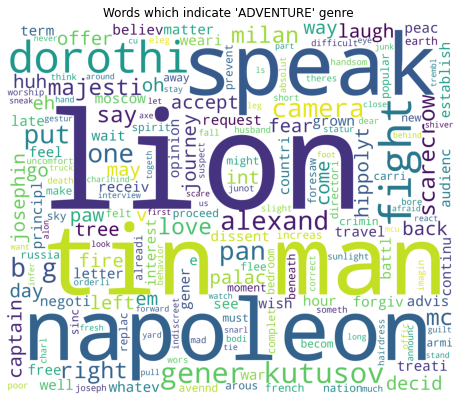

In [25]:
# Creating wordcloud for adventure genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(adventure)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'ADVENTURE' genre ")
plt.show()

### Bag Of Words Model

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [27]:
y = df['genre'].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


### Multinomial Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [30]:
# Predicting the Test set results
y_pred = nb_classifier.predict(X_test)

##### Accuracy

In [31]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score1 = accuracy_score(y_test, y_pred)
print("Accuracy : {}%".format(round(score1*100,2)))

Accuracy : 89.57%


In [32]:
cm = confusion_matrix(y_test, y_pred)

#### Confusion Matrix Plot

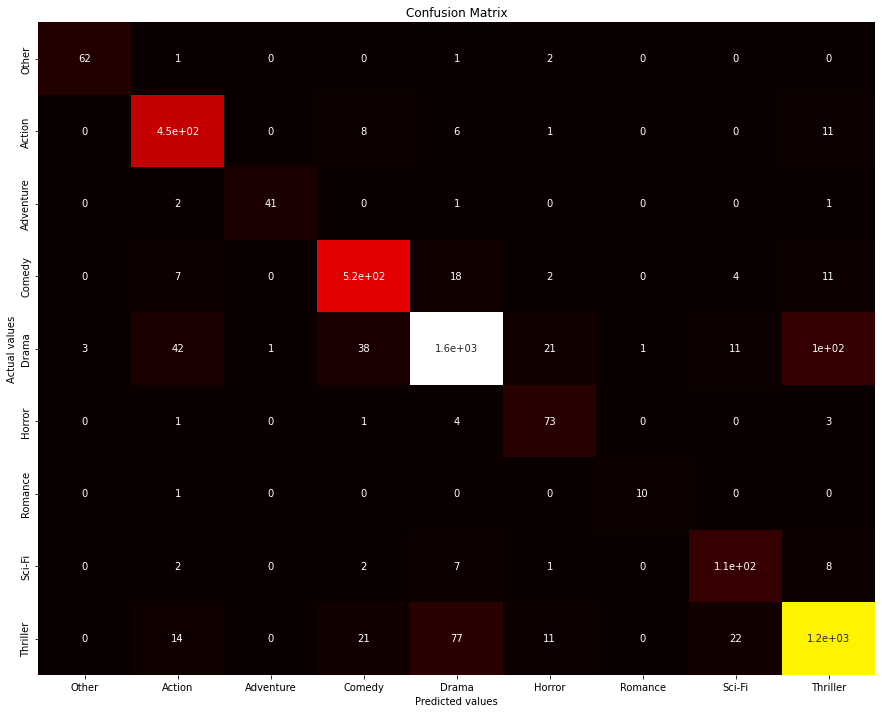

In [33]:
plt.figure(figsize=(15,12))
axis_labels = ['Other', 'Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance', 'Sci-Fi', 'Thriller']
sns.heatmap(data=cm, annot=True, cmap='hot', xticklabels=axis_labels, yticklabels=axis_labels,cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

#### Hyperparameter tuning

In [34]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,0.5,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
The best accuracy is 91.34% with alpha value as 0.1


#### Function for Genre Prediction

In [42]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return nb_classifier.predict(temp)[0]

'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8

# test

In [55]:
test=genre_prediction('A snarling Borg face half human, half machine, a cybernetic nightmare. Strange, bio mechanical WEAPONS extruding from Borg bodies, RIPPING into human flesh. A crewmember PULLED into a bed of machinery. WORF Fire at will! But the Borg are already on top of them. Its a brutal fight in close quarters with no escape. Phasers and Borg lasers lighting up the corridor, bodies flying through the air... utter chaos and terror. The fight goes hand to hand and Worf sees that they dont have a chance... WORF throwing off a Borg Fall back! The team starts backpedaling, FIRING as they go...but the Borg are unstoppable now they put up personal force fields to protect themselves. WORF Go, go, GO! Worf pushes his men down the corridor. Everyone turns and RUNS like hell. Worf bends down and grabs a frightened Lieutenant by the collar, pulling him along. 94 VAR')

In [56]:
test

8

In [ ]:
##thriller